(rasch-model-notebook)=
# Modello di Rasch 

In [1]:
suppressPackageStartupMessages({
    library("tidyverse")
    library("ltm")
    library("mirt")
    library("grid")
    library("TAM")
    # devtools::install_github("masurp/ggmirt")
    library("ggmirt")
    library("latex2exp")
    })

## Introduzione alla Teoria della Risposta all'Item

La psicometria, disciplina focalizzata sulla misurazione quantitativa delle abilità, atteggiamenti e tratti psicologici, ha subìto un'evoluzione significativa grazie all'emergere della Teoria della Risposta all'Item (IRT). Questo modello, fondamentale nel campo dell'analisi psicometrica, si distingue per la sua capacità di affrontare e conceptualizzare gli errori di misurazione, inevitabili nelle risposte umane, in modo più efficace rispetto ai metodi tradizionali. In questo capitolo, esploreremo le basi dell'IRT, le sue applicazioni e l'importanza nel contesto della psicometria moderna.

La misurazione in psicometria si occupa di quantificare costrutti non osservabili, come l'intelligenza, la personalità e gli atteggiamenti. Tali misurazioni sono spesso soggette a errori, dovuti alla variabilità intrinseca delle risposte umane. Tradizionalmente, la psicometria si è affidata a teorie come la Classical Test Theory (CTT), che, pur efficaci, presentano limitazioni, soprattutto nella gestione degli errori di misurazione e nella loro assunzione di uniformità tra gli item di un test.

L'IRT rappresenta un cambiamento paradigmatico nella misurazione psicometrica. A differenza della CTT, che si concentra sul punteggio totale di un test, l'IRT si focalizza sulle risposte a singoli item, permettendo un'analisi più dettagliata e accurata delle capacità di un individuo. L'essenza dell'IRT sta nella sua capacità di modellare la probabilità che un individuo risponda correttamente a un item specifico, basandosi sulle caratteristiche dell'item e sul livello di abilità dell'individuo.

Uno degli aspetti distintivi dell'IRT è la sua applicabilità alle risposte categoriali, comuni nei test psicometrici, dove gli individui selezionano risposte da un insieme di categorie predefinite. Questo approccio è cruciale in test come quelli di intelligenza, dove le risposte non sono solo giuste o sbagliate, ma possono riflettere diversi livelli di comprensione o abilità.

L'IRT trova applicazione in una vasta gamma di contesti. È fondamentale nello sviluppo di test standardizzati, nella valutazione della qualità degli item di un test, e nella costruzione di punteggi compositi basati su risposte a più item. Inoltre, l'IRT è impiegata per sviluppare strumenti di valutazione più equi e validi, offrendo una migliore comprensione delle abilità o tratti misurati.

L'aspetto unico dell'IRT è la sua capacità di analizzare l'interazione tra le caratteristiche degli item e le abilità degli individui. Questo permette una comprensione più approfondita di come diversi tipi di item influenzino le risposte degli individui, consentendo una misurazione più accurata e personalizzata.

Nonostante i suoi numerosi vantaggi, l'implementazione dell'IRT presenta sfide, come la necessità di grandi campioni di dati e la complessità nella modellizzazione statistica. Tuttavia, con l'avanzamento della tecnologia e la crescente disponibilità di dati, l'IRT continua a evolversi, offrendo nuove opportunità per affinare ulteriormente la misurazione psicometrica.

In conclusione, la Teoria della Risposta all'Item è un pilastro fondamentale nella misurazione psicometrica moderna. La sua capacità di affrontare i limiti delle teorie tradizionali e di fornire una comprensione più profonda e dettagliata delle risposte umane la rende uno strumento indispensabile per i ricercatori e i professionisti del settore. Con le sue applicazioni in continua espansione e il suo impatto sullo sviluppo di strumenti di valutazione più accurati e validi, l'IRT si configura come una teoria essenziale per il futuro della psicometria. 

Nella seguente discussione dei modelli IRT seguiremo da vicino l'esposizione fornita da {cite:t}`debelak2022introduction` a cui si rimanda per ulteriori approfondimenti.

## La scala di Guttman

Prima di esplorare l'IRT, è importante comprendere lo scaling di Guttman, che stabilisce una relazione tra il livello di abilità di un rispondente e le sue risposte agli item. La Scala di Guttman, proposta da Louis Guttman, collega le abilità delle persone alla difficoltà degli item di un test. Questa scala viene rappresentata graficamente, mostrando come la probabilità di rispondere correttamente a un item vari con il livello di abilità del rispondente. Le *curve caratteristiche degli item* (ICC) illustrano questa probabilità. 

Sull'asse verticale del grafico si posiziona la probabilità di rispondere correttamente a un elemento, che Guttman sostiene essere o zero o 1.0. L'asse orizzontale rappresenta le abilità delle persone che affrontano il test. Le cinque frecce indicano cinque persone con diversi livelli di abilità.

Le linee nel grafico, note come curve caratteristiche degli item, mostrano la probabilità che una persona con un determinato livello di abilità risponda correttamente a ciascun elemento.

Ad esempio, una persona con un livello di abilità molto basso (indicato dalla prima freccia a sinistra) avrebbe una probabilità zero di rispondere correttamente a qualsiasi elemento. Persone con abilità leggermente superiori (rappresentate dalle successive frecce) avrebbero probabilità diverse di rispondere correttamente agli item, a seconda della loro posizione rispetto alla difficoltà di ciascun item. La quinta persona (indicata dalla freccia più a destra) risponderebbe correttamente a tutti e tre gli elementi.

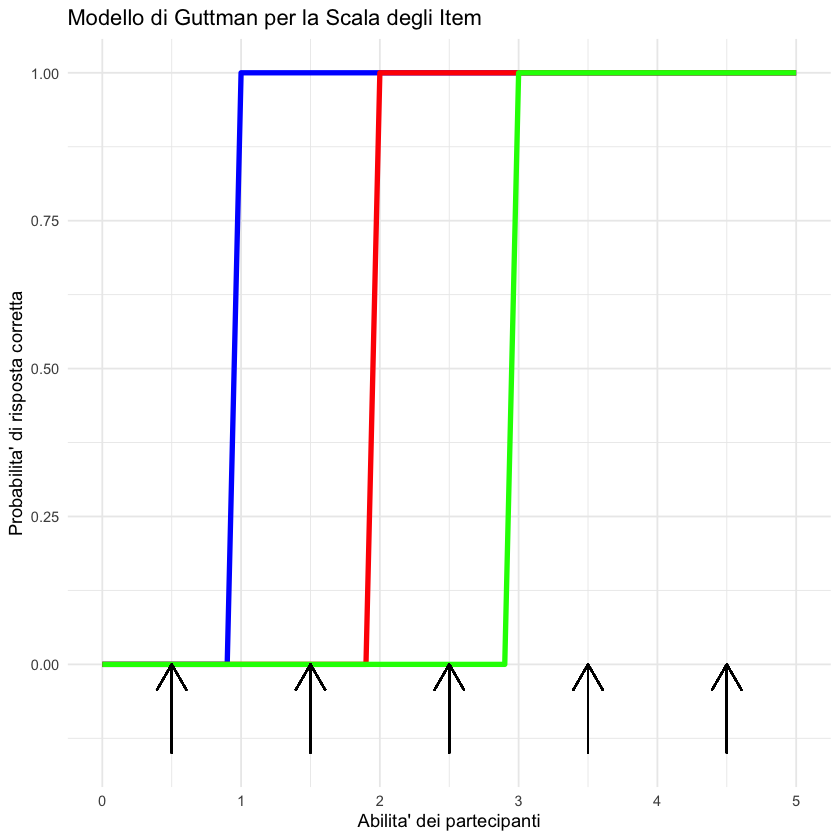

In [15]:
abilita <- seq(0, 5, by = 0.1)
difficolta_item_1 <- 1
difficolta_item_2 <- 2
difficolta_item_3 <- 3
probabilita_item_1 <- as.numeric(abilita >= difficolta_item_1)
probabilita_item_2 <- as.numeric(abilita >= difficolta_item_2)
probabilita_item_3 <- as.numeric(abilita >= difficolta_item_3)
data <- data.frame(abilita, probabilita_item_1, probabilita_item_2, probabilita_item_3)

p <- ggplot(data, aes(x = abilita)) +
    geom_line(aes(y = probabilita_item_1), color = "blue", linewidth = 1.5) +
    geom_line(aes(y = probabilita_item_2), color = "red", linewidth = 1.5) +
    geom_line(aes(y = probabilita_item_3), color = "green", linewidth = 1.5) +
    labs(
        x = "Abilita' dei partecipanti", y = "Probabilita' di risposta corretta",
        title = "Modello di Guttman per la Scala degli Item"
    ) +
    theme_minimal()

y_posizione_frecce <- -0.15 

p <- p + geom_segment(aes(x = 0.5, y = y_posizione_frecce, xend = 0.5, yend = 0), arrow = arrow(), color = "black") # Persona con bassa abilità
p <- p + geom_segment(aes(x = 1.5, y = y_posizione_frecce, xend = 1.5, yend = 0), arrow = arrow(), color = "black") # Seconda persona
p <- p + geom_segment(aes(x = 2.5, y = y_posizione_frecce, xend = 2.5, yend = 0), arrow = arrow(), color = "black") # Terza persona
p <- p + geom_segment(aes(x = 3.5, y = y_posizione_frecce, xend = 3.5, yend = 0), arrow = arrow(), color = "black") # Quarta persona
p <- p + geom_segment(aes(x = 4.5, y = y_posizione_frecce, xend = 4.5, yend = 0), arrow = arrow(), color = "black") # Quinta persona

print(p)


Il modello di Guttman, nel contesto della testistica psicologica, si basa su un'ipotesi fondamentale nella somma dei punteggi ottenuti dai partecipanti in un test. Secondo questa ipotesi, se un individuo risponde correttamente a un item di difficile risoluzione, si presume che abbia anche risposto correttamente a tutti gli item precedenti, di difficoltà inferiore. Questo principio implica che la capacità di rispondere a domande più difficili include implicitamente l'abilità di rispondere a quelle più semplici. Pertanto, il punteggio totale ottenuto in un test viene considerato un indicatore affidabile dell'abilità complessiva della persona.

Tuttavia, il modello di Guttman presenta alcune limitazioni. Una delle critiche principali è che raramente gli item di abilità formano scale di Guttman pure. In altre parole, non è sempre vero che i test seguano un andamento così rigido e prevedibile come quello proposto da Guttman. Infatti, nella realtà, la probabilità di rispondere correttamente a un item non sempre aumenta bruscamente da 0 a 1 al raggiungimento di una certa soglia di abilità, ma può variare più gradualmente nei termini di una funzione sigmoidale. Inoltre, è anche possibile ipotizzare che la ripidità delle ICC si differenzi per i diversi item di un test.

## Il Modello di Rasch

Supponiamo di voler misurare le competenze matematiche di un gruppo di individui. Sebbene non possiamo osservare direttamente la competenza matematica, possiamo dedurne l'esistenza attraverso osservazioni comportamentali. Pertanto, la competenza matematica è considerata una variabile latente e, nel contesto attuale, ciò significa che è concettualizzata come un continuum latente. Per valutare le competenze matematiche degli individui, viene somministrato loro uno strumento contenente cinque item. Le loro risposte a questo strumento costituiscono le nostre osservazioni comportamentali. Gli item dello strumento sono posizionati in vari punti lungo il continuum che rappresenta la competenza matematica.

Supponiamo di voler rappresentare sia la difficoltà degli item di un test che le abilità dei rispondenti sullo stesso continuum. L'estremità superiore del continuum indica una maggiore competenza matematica rispetto all'estremità inferiore. Questo significa che gli item situati verso il lato destro richiedono una maggiore competenza per ottenere una risposta corretta rispetto agli item situati verso il lato sinistro. Gli item sono posizionati lungo tutto il continuum, alcuni sopra lo 0 e altri sotto lo 0. Ad esempio, il primo item è situato a -2, il secondo a -1, e così via. Utilizziamo la lettera greca $\beta$ per rappresentare la posizione di un item e $\beta_i$ per la posizione dell'i-esimo item su questo continuum. Inoltre, la lettera greca $\theta$ è usata per rappresentare la posizione della persona su questo continuum. La posizione di una persona riflette la sua competenza matematica. 

Una conseguenza di posizionare sia le persone che gli item sullo stesso continuum è che è possibile fare affermazioni comparative su come una persona tipica potrebbe rispondere a un item. Per esempio, poiché l'estremità inferiore del continuum rappresenta una competenza matematica minore rispetto all'estremità superiore, gli item situati nell'estremità inferiore richiedono meno competenza per ottenere una risposta corretta rispetto a quelli nell'estremità superiore. Di conseguenza, è probabile che una persona situata a 0 risponda correttamente agli item situati nell'estremità inferiore del continuum (ad esempio, l'item 1 con $\beta_1$ = -2). Tuttavia, se somministriamo un item situato più vicino allo 0, diciamo l'item 2 con $\beta_2$ = -1, allora c'è una buona possibilità che la persona risponda correttamente, ma riconosciamo che c'è una maggiore possibilità che possa rispondere in modo errato. Allo stesso modo, somministrare un item, come l'item 4 ($\beta_4$ = 1), a una persona situata a 0, probabilmente risulterà in una risposta errata, ma c'è ancora una possibilità considerevole che possa rispondere correttamente all'item a causa della vicinanza nella competenza richiesta dall'item e quella posseduta dalla persona. In altre parole, maggiore è la distanza tra le posizioni di persona e item, maggiore è la certezza che abbiamo su come ci si aspetta che la persona risponda all'item. Tuttavia, man mano che questa distanza si avvicina a zero, più è probabile che si dica che c'è una probabilità del 50-50 che la persona risponda correttamente all'item. Le aspettative su come una persona risponderà sono dunque espresse in termini probabilistici (cioè, "le probabilità di una risposta corretta sono...").

Sebbene l'idea che la probabilità di fornire una risposta corretta aumenti con la posizione di una persona su un continuum latente possa apparire intuitiva, è fondamentale validare questa ipotesi con dati concreti. Per fare ciò, analizziamo un set di dati reali che riflettono la proporzione di risposte corrette per ciascun item in relazione al punteggio totale ottenuto in un test. In questo specifico esempio, i partecipanti hanno risposto a cinque item progettati per valutare le loro abilità matematiche. 

In [2]:
math_dat <- rio::import("../data/deAyala/Math.txt")
head(math_dat)

,V1,V2,V3,V4,V5
,<int>,<int>,<int>,<int>,<int>
1,1,1,0,0,0
2,1,1,1,0,0
3,1,0,0,0,0
4,1,1,1,0,0
5,1,0,1,1,0
6,1,1,1,0,0


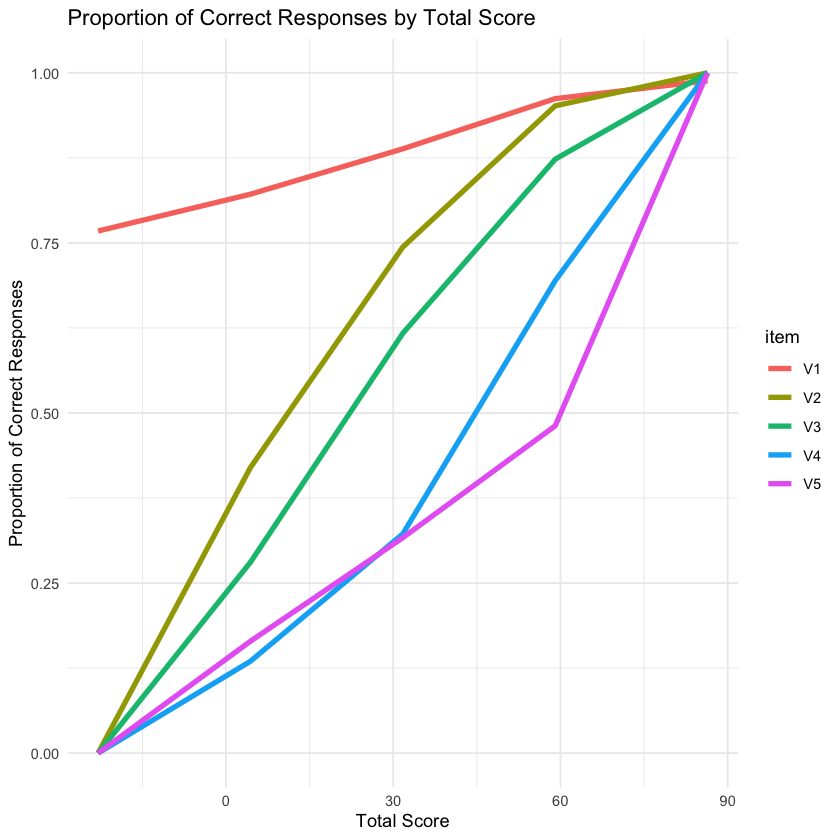

In [20]:
# Calculate the total score for each subject
math_dat$total_score <- rowSums(math_dat[, -1])

# Prepare data for plotting
plot_data <- lapply(names(math_dat)[1:5], function(item) {
    math_dat %>%
        group_by(total_score) %>%
        summarise(
            proportion = mean(get(item) == 1)
        ) %>%
        mutate(item = item)
})

plot_data <- do.call(rbind, plot_data)

# Plotting
ggplot(plot_data, aes(x = total_score, y = proportion, group = item, color = item)) +
    geom_line(linewidth = 1.5) +
    labs(
        x = "Total Score", 
        y = "Proportion of Correct Responses",
        title = "Proportion of Correct Responses by Total Score"
    ) +
    theme_minimal()

Nell'esame di questo campione di dati reali, possiamo osservare come la probabilità di fornire una risposta corretta ad un item cresce all'aumentare della competenza matematica generale, rappresentata dal punteggio totale. Questo andamento conferma l'ipotesi che maggiore è l'abilità generale di un individuo, maggiori sono le sue possibilità di rispondere correttamente agli item del test.

## Curva Caratteristica dell'Item

Oltre a una semplice descrizione delle tendenze osservate nelle risposte, come abbiamo già fatto, miriamo a sviluppare un modello che incorpori la nostra comprensione di come la posizione di un individuo su un continuum latente influenzi le sue risposte. La manifesta non linearità, come dimostrato nella figura precedente, suggerisce che un modello di regressione lineare non sarebbe adatto a questo scopo. Data la presenza di un pattern ogivale nelle distribuzioni cumulative, come nella distribuzione normale cumulativa o in quella logistica, è opportuno valutare l'uso di una di queste distribuzioni per la nostra modellazione. Pertanto, optiamo per la funzione logistica, grazie alla sua semplicità concettuale ed operativa. Questo metodo ci consente di tracciare la cosiddetta "curva caratteristica dell'item" (*Item Characterisric Curve*, ICC), detta anche *funzione caratteristica dell'item*, che descrive la probabilità di risposta corretta a un item specifico in relazione all'abilità latente del rispondente.

La curva caratteristica dell'item  può essere vista come un affinamento del modello di Guttman. In questo modello avanzato, la probabilità di fornire una risposta corretta a un item non subisce necessariamente un incremento improvviso da 0 a 1 al superamento di una determinata soglia di abilità. Piuttosto, tale probabilità varia in maniera più graduale, descrivendo una curva sigmoidale. Ciò offre una rappresentazione più sfumata e dettagliata del processo di risposta. 

A differenza dello scaling di Guttman, la Teoria della Risposta all'Item (IRT) propone dunque un modello statistico per descrivere l'ICC. All'interno dell'ampio spettro dei modelli IRT, il modello di Rasch si distingue per la sua semplicità. Esso assume che tutte le curve caratteristiche degli item siano parallele, condividendo la stessa inclinazione. Questo presupposto implica che la difficoltà di ogni item è l'unica variabile che influenza la forma della curva, fornendo un quadro chiaro della relazione tra la probabilità di una risposta corretta e l'abilità latente del rispondente.

La figura seguente offre una rappresentazione grafica delle Curve Caratteristiche dell'Item (ICC) per i cinque item, basata sul modello di Rasch, utilizzando i dati che abbiamo analizzato in precedenza. L'asse orizzontale (asse x) rappresenta l'abilità latente $\theta$ dei rispondenti, mentre l'asse verticale (asse y) indica la probabilità di una risposta corretta. Le curve sigmoidali, ciascuna in un colore diverso, rappresentano i diversi item. Si noti che le curve sono parallele. Queste curve mostrano come la probabilità di rispondere correttamente a ogni item varia in funzione dell'abilità del rispondente.

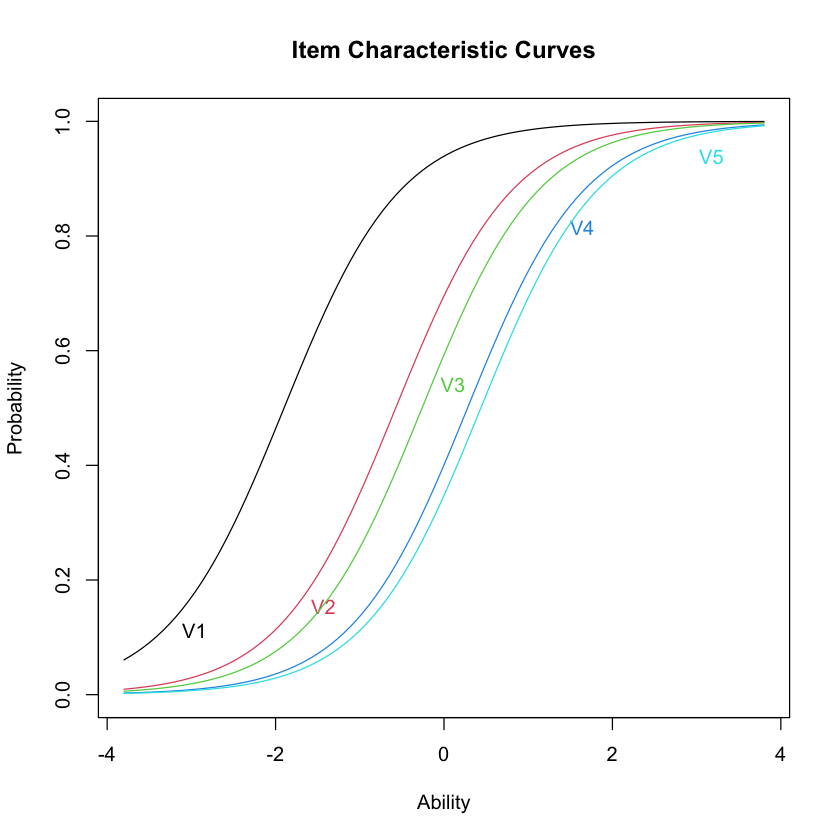

In [5]:
math_dat <- rio::import("../data/deAyala/Math.txt")

# Adatta il modello di Rasch
rasch_model <- rasch(math_dat)

# Crea le curve caratteristiche degli item
plot(rasch_model, type = "ICC")

La funzione utilizzata nella figura precedente per generare le Curve Caratteristiche dell'Item (ICC) secondo il modello di Rasch è stata $ P = \frac{1}{1 + \exp(-a \cdot (\theta - b))} $, dove $ P $ è la probabilità di una risposta corretta, $ a $ è il parametro di discriminazione dell'item (nel modello di Rasch classico è uguale per tutti gli item), $ \theta $ è l'abilità del rispondente, e $ b $ è il parametro di difficoltà dell'item. Utilizzando questa formula, possiamo creare una funzione in `R` che genera le ICC per un insieme di item: `1 / (1 + exp(-a * (ability_range - b)))`. Mantenendo fisso il parametro di discriminazione `a` a 1 e variando il parametro di difficoltà `b`, la funzione può essere scritta come segue per produrre le curve per diversi item:

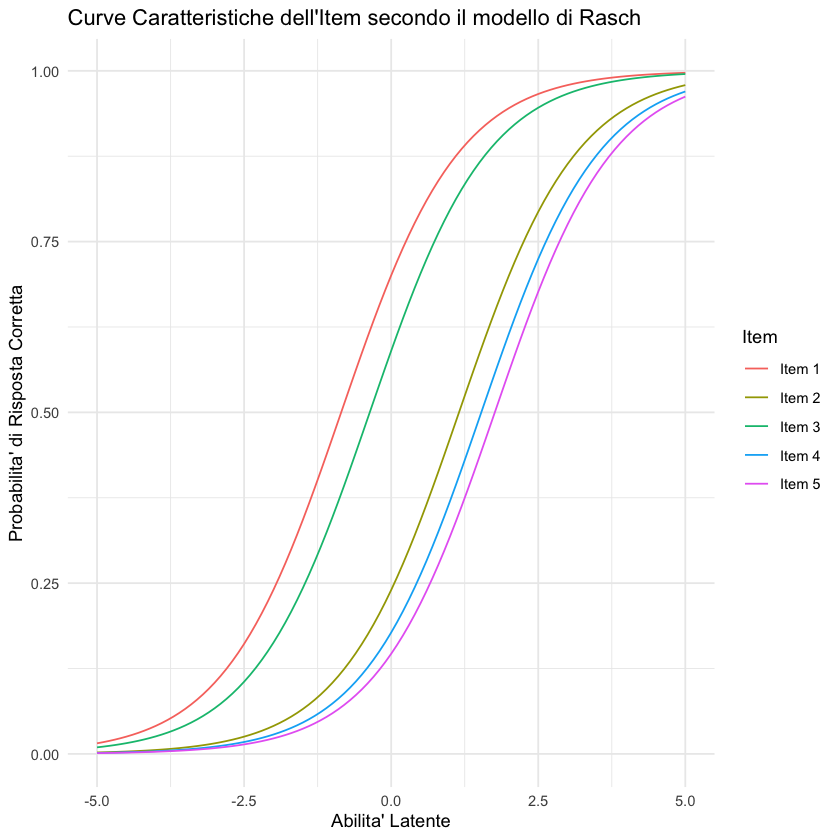

In [27]:
# Funzione per disegnare le ICC del modello di Rasch
draw_ICC_Rasch <- function(num_items = 5, ability_range = seq(-5, 5, by = 0.1), a = 1) {
    plot_data <- data.frame()

    for (i in 1:num_items) {
        b <- runif(1, -2, 2) # Genera un valore casuale per il parametro di difficoltà dell'item
        probabilities <- 1 / (1 + exp(-a * (ability_range - b)))

        plot_data <- rbind(plot_data, data.frame(
            Ability = ability_range,
            Probability = probabilities,
            Item = paste("Item", i)
        ))
    }

    # Creare il plot
    ggplot(plot_data, aes(x = Ability, y = Probability, color = Item)) +
        geom_line() +
        labs(
            title = "Curve Caratteristiche dell'Item secondo il modello di Rasch",
            x = "Abilita' Latente",
            y = "Probabilita' di Risposta Corretta"
        ) +
        theme_minimal()
}

set.seed(123)
draw_ICC_Rasch(num_items = 5)

La formulazione del modello di Rasch si differenzia dalla teoria classica dei test (CTT) in diversi modi cruciali. 

Nel modello di Rasch, l'analisi è condotta sia a livello di singolo item sia a livello dello strumento di misurazione nel suo complesso. Questo è in contrasto con la teoria classica dei test, dove l'analisi si concentra principalmente a livello dello strumento di misurazione nel suo complesso. Nella teoria classica dei test, il punteggio totale su uno strumento ($X$), come espresso nell'equazione $X = T + E$, è definito in termini di $T$ (abilità vera) ed $E$ (errore). Invece, nel modello di Rasch, ciò che viene modellato è la risposta all'item specifico, seguendo così la tradizione focalizzata sull'item di Guttman.

Il modello di Rasch include sia un parametro della persona sia parametri dell'item. Questo approccio rende il modello di Rasch un modello multi-livello, dove vengono considerati sia i fattori relativi all'individuo che quelli specifici di ciascun item.

Il modello di Rasch si concentra sulla modellazione della probabilità delle risposte osservate, piuttosto che sulla somma delle risposte, come avviene nella teoria classica dei test. Questo approccio rappresenta una significativa deviazione dalla CTT. Mentre la CTT si concentra sui punteggi totali e la loro distribuzione, il modello di Rasch si focalizza sulle probabilità delle risposte individuali, offrendo una comprensione più dettagliata delle prestazioni dei rispondenti e delle caratteristiche degli item.

In sintesi, il modello di Rasch fornisce un'analisi che tiene conto sia delle caratteristiche dei rispondenti sia delle proprietà degli item e si concentra sulla probabilità di ogni singola risposta piuttosto che sulla somma totale delle risposte. Assume che tutte le ICC siano parallele. Altri modelli IRT assumono invece che le ICC abbiano pendenze diverse.

## Il Modello di Rasch per Risposte Binarie

Il Modello di Rasch esplora la relazione tra l'abilità latente di un individuo ($\theta$) e le sue risposte osservate, delineando una caratteristica di curva degli item (ICC) necessariamente monotona. In questo modello, un incremento dell'abilità latente $\theta_p$ di una persona p comporta un aumento nella probabilità di fornire una risposta corretta all'item $i$. Questa relazione è descritta attraverso la funzione logit, impiegata anche nella regressione logistica:

$$ 
\text{Pr}(U_{i} = 1 \mid \theta) = \frac{e^z}{1 + e^z},
$$

dove $\text{Pr}(U_{i} = 1 \mid \theta)$ rappresenta la probabilità di una risposta corretta all'item $i$, data l'abilità latente $\theta$. La variabile $z$ è una funzione dell'abilità latente $\theta$.

Per una definizione più precisa di $z$, consideriamo come determinante la distanza tra la posizione della persona $p$ ($\theta_p$) e quella dell'item $i$ ($\beta_i$). Definendo quindi $z = \theta_p - \beta_i$, formuliamo un modello che predice la probabilità di una risposta corretta in funzione della posizione dell'item e della persona.

Sostituendo $\theta_p - \beta_i$ per $z$ nella funzione logistica, otteniamo:

$$ 
\text{Pr}(U_{pi} = 1 \mid \theta_p, \beta_i) = \frac{\exp(\theta_p - \beta_i)}{1 + \exp(\theta_p - \beta_i)} = \frac{1}{1 + \exp(-(\theta_p - \beta_i))}. 
$$ (eq-rasch-model)

Questa formula, $\text{Pr}(U_{pi} = 1 \mid \theta_p, \beta_i)$, indica la probabilità che un individuo, con un livello di abilità $\theta_p$, risponda correttamente all'item $i$. Il rapporto fra l'abilità $\theta_p$ del rispondente e la difficoltà $\beta_i$ dell'item influenza direttamente tale probabilità. Più la differenza è marcata a favore dell'abilità, maggiore sarà la probabilità di una risposta corretta, riflettendo il principio che individui più abili tendono a rispondere correttamente anche agli item più difficili.

In termini semplificati, la formula stabilisce che la probabilità di fornire una risposta di tipo 1 (cioè una risposta corretta) per l'item i è funzione della distanza tra la posizione di una persona $p$ ($\theta_p$) e quella dell'item $i$ ($\beta_i$). Il lato destro dell'equazione converte la distanza (potenzialmente infinita) tra posizione della persona e quella dell'item in una probabilità compresa nell'intervallo [0, 1].

È importante notare che, sebbene le posizioni teoriche degli item ($\beta_i$) e delle persone ($\theta_p$) varino da $-\infty$ a $+\infty$, tipicamente esse si collocano tra -3 e +3. Nei test di competenza, le posizioni degli item sono interpretate come livelli di difficoltà. Item situati al di sotto di 0.0 sono considerati "facili" (ad esempio, sotto -2.0), mentre quelli al di sopra di 0.0 sono "difficili" (ad esempio, oltre +2.0). Gli item intorno allo 0.0 hanno una difficoltà media: quelli "facili" sono generalmente risposti correttamente da persone con abilità inferiore, mentre quelli "difficili" tendono ad essere corretti solo da coloro con abilità superiore.

## Rappresentazione Alternativa della Funzione Logistica

La funzione logistica utilizzata nel modello di Rasch può essere scritta in due modi: con la funzione esponenziale sia al numeratore sia al denominatore (a sinistra), oppure equivalentemente con la funzione esponenziale solo al denominatore, seguita dal suo argomento negativo (a destra):

$$ 
\frac{\exp(\theta_p - \beta_i)}{1 + \exp(\theta_p - \beta_i)} = \frac{1}{1 + \exp(-(\theta_p - \beta_i))} 
$$

Per dimostrare l'equivalenza delle due espressioni della funzione logistica nel modello di Rasch, seguiamo i seguenti  passaggi algebrici. Per semplificare il lato destro, utilizziamo la proprietà dell'esponenziale che afferma $ e^{-x} = \frac{1}{e^x} $. Quindi, riscriviamo $ \exp(-(\theta_p - \beta_i)) $ come $ \frac{1}{\exp(\theta_p - \beta_i)} $:

   $$ \frac{1}{1 + \frac{1}{\exp(\theta_p - \beta_i)}} $$

Il denominatore del lato destro diventa $ 1 + \frac{1}{\exp(\theta_p - \beta_i)} $. Per combinare i termini nel denominatore, otteniamo un denominatore comune:

   $$ \frac{1}{\frac{\exp(\theta_p - \beta_i) + 1}{\exp(\theta_p - \beta_i)}} $$

Simplificando ulteriormente, il denominatore diventa $ \exp(\theta_p - \beta_i) + 1 $, quindi l'intera espressione diventa:

   $$ \frac{1}{\exp(\theta_p - \beta_i) + 1} $$

Possiamo ora invertire la frazione per ottenere il lato sinistro dell'equazione originale:

   $$ \frac{\exp(\theta_p - \beta_i)}{\exp(\theta_p - \beta_i) + 1} $$

Quindi, abbiamo dimostrato che il lato sinistro e il lato destro dell'equazione originale sono effettivamente equivalenti.

### Esempio Computazionale

Per illustrare come il modello di Rasch venga utilizzato per calcolare i punti su una curva caratteristica dell'item, consideriamo il seguente problema esemplificativo. I valori dei parametri dell'item sono:

- a = 1 è il parametro di discriminazione dell'item,
- b = -0.5 è il parametro di difficoltà dell'item.

Troviamo la probabilità di rispondere correttamente a questo item al livello di abilità theta = 1.5. 

In [32]:
icc <- function(a, b, theta) {
    1 / (1 + exp(-a * (theta - b)))
}

a = 1
b = -0.5
theta = 1.5
icc(a, b, theta)

[1] 0.8807971

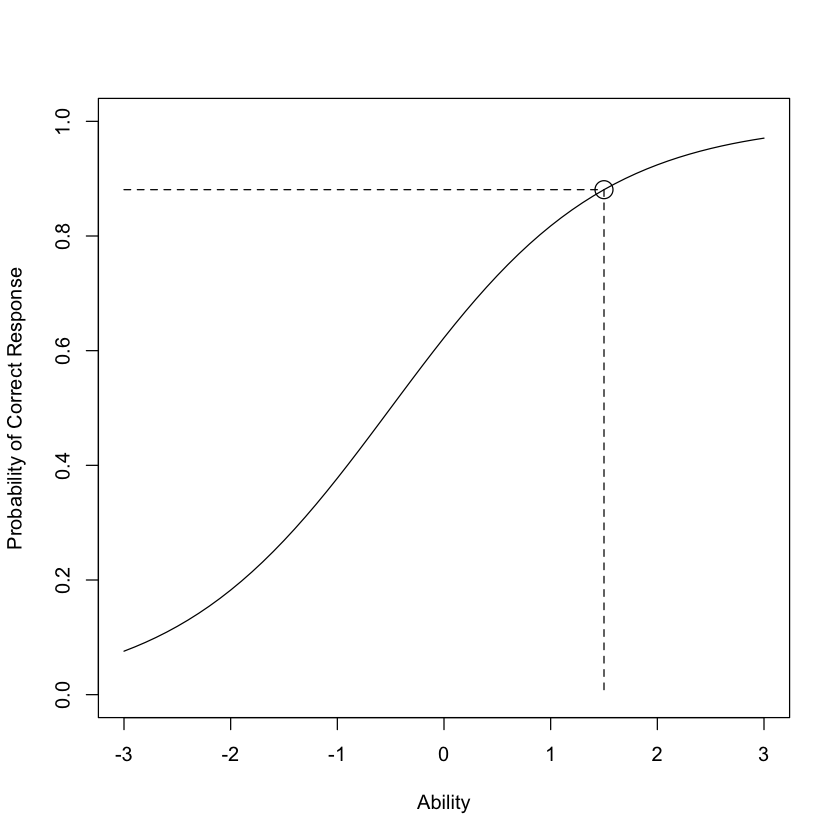

In [43]:
theta_range <- seq(-3, 3, .1)
plot(theta_range, icc(a, b, theta_range),
    type = "l", xlim = c(-3, 3), ylim = c(0, 1),
    xlab = "Ability", ylab = "Probability of Correct Response"
)
points(theta, icc(a, b, theta), cex=2)
segments(-3, icc(a, b, theta), theta, icc(a, b, theta), lty = "dashed")
segments(theta, icc(a, b, theta), theta, 0, lty = "dashed")

## La funzione Logistica

Il Modello di Rasch impiega la funzione logistica per correlare abilità e difficoltà con la probabilità di una risposta corretta. La funzione logistica è solitamente definita come:

$$ f(x) = \frac{\exp(x)}{1 + \exp(x)} $$

Possiamo ottenere il Modello di Rasch sostituendo $ \theta_p - \beta_i $ per $ x $ in questa equazione. Questo significa che possiamo calcolare la probabilità di una risposta corretta nel Modello di Rasch applicando la funzione logistica alla differenza tra $ \theta_p $ e $ \beta_i $, ovvero $ \text{Pr}(U_{pi} = 1 \mid \theta_p, \beta_i) = f(\theta_p - \beta_i) $. La funzione logistica trasforma i logit, o log-odds, in probabilità.

Le quote esprimono la probabilità relativa di una risposta corretta rispetto a una risposta errata, e il cosiddetto logit è il logaritmo naturale delle quote. Ad esempio, quote di tre indicano che una risposta corretta è tre volte più probabile di una risposta errata, mentre quote di 1/3 indicano che una risposta corretta è tre volte meno probabile di una risposta errata. Se la probabilità di una risposta corretta è data da $ \pi $, la probabilità di una risposta errata è $ 1-\pi $, e le quote sono $ O = \frac{\pi}{1-\pi} $. Qualsiasi quota $ O $ corrisponde a un unico logit $ \log(O) $ e a una unica probabilità $ \pi $. Questo ci permette di definire il Modello di Rasch usando il logit, che è un'alternativa all'uso della probabilità, come abbiamo fatto sopra. Per un parametro di abilità $ \theta_p $ e un parametro di difficoltà $ \beta_i $, si può dimostrare che i log-odds sono $ \theta_p - \beta_i $. Questo porta alla forma logit del Modello di Rasch:

Questo porta alla forma logit del modello di Rasch,

$$ 
\log \left( \frac{\text{Pr}(U_{pi} = 1 | \theta_p, \beta_i)}{\text{Pr}(U_{pi} = 0 | \theta_p, \beta_i)} \right) = \theta_p - \beta_i. 
$$ (eq-rasch-logit)

Possiamo dimostrarlo come segue. Come notato sopra, le quote sono definite per essere $ O = \frac{\pi}{1 - \pi} $ per il modello di Rasch, dove

$$ 
\pi = \frac{\exp(\theta_p - \beta_i)}{1 + \exp(\theta_p - \beta_i)}. 
$$

Come deriveremo in dettaglio nella Sezione {ref}`sec-rasch-prob-risp-errata`,

$$ 1 - \pi = 1 - \frac{\exp(\theta_p - \beta_i)}{1 + \exp(\theta_p - \beta_i)} = \frac{1}{1 + \exp(\theta_p - \beta_i)}. $$

Sostituendo questi termini nella definizione di $ O $ e cancellando i termini comuni otteniamo

$$ O = \frac{\exp(\theta_p - \beta_i)}{1 + \exp(\theta_p - \beta_i)} = \exp(\theta_p - \beta_i). $$

Quindi,

$$ \log(O) = \theta_p - \beta_i. $$

Questa equazione dimostra che, nella scala dei logit, la probabilità di fornire una risposta corretta all'item i è direttamente proporzionale alla differenza tra il livello di abilità $ \theta_p $ del rispondente e la difficoltà dell'item $ \beta_i $. Una maggiore differenza tra $ \theta_p $ e $ \beta_i $ implica una più alta probabilità di risposta corretta, $ \text{Pr}(U_{pi} = 1 \mid \theta_p) = 1 $, in confronto alla probabilità di una risposta errata. Di conseguenza, valori elevati sulla scala dei logit indicano una discrepanza significativa a favore dell'abilità del rispondente rispetto alla difficoltà dell'item, e quindi una maggiore probabilità di ottenere una risposta corretta.

Un ulteriore vantaggio della forma logit è che offre una semplice interpretazione di $ \theta_p - \beta_i $ come il logit della probabilità che la persona $p$ risponda correttamente all'item $i$. Questo significa che il logit è lineare in $ \theta_p $, con intercetta y pari a $ -\beta_i $ e pendenza uno. La figura seguente dimostra ciò per due item $i$ e $j$ con difficoltà $ \beta_i = -1 $ e $ \beta_j = 1 $. Vediamo che le due linee sono parallele, una conseguenza dell'avere la stessa pendenza. L'unica differenza tra le linee è dove esse intersecano l'asse y: $ -\beta_i $ nel caso dell'item $i$, e $ -\beta_j $ nel caso dell'item $j$. In questa rappresentazione, è direttamente visibile che le ICC del Modello di Rasch sono parallele, mentre sulla scala delle probabilità ciò è evidente solo nella loro sezione centrale (sebbene si possa notare che esse non si incrociano).

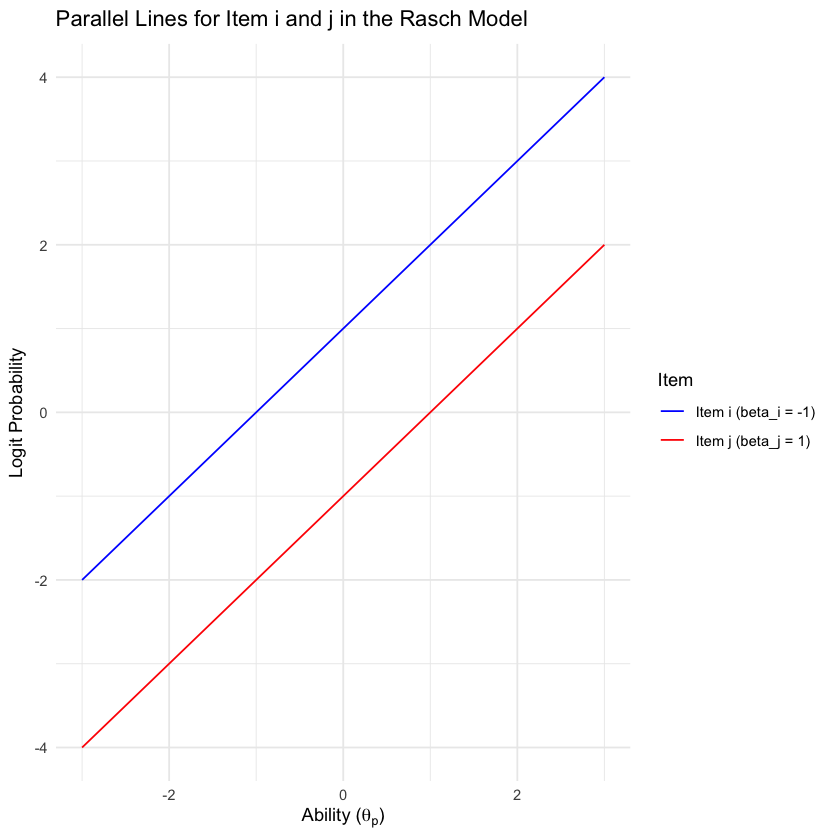

In [22]:
# Creazione di un dataframe con i valori di abilità (theta_p) e le difficoltà degli item (beta)
theta_p <- seq(-3, 3, length.out = 100)
beta_i <- -1
beta_j <- 1

# Calcolo dei logit per gli item i e j
logit_i <- theta_p - beta_i
logit_j <- theta_p - beta_j

# Creazione del dataframe per il plot
data <- data.frame(
    Ability = c(theta_p, theta_p),
    Logit = c(logit_i, logit_j),
    Item = factor(c(rep("Item i (beta_i = -1)", length(theta_p)), rep("Item j (beta_j = 1)", length(theta_p))))
)

# Creazione del grafico
ggplot(data, aes(x = Ability, y = Logit, color = Item)) +
    geom_line() +
    scale_color_manual(values = c("blue", "red")) +
    ggtitle(TeX("Parallel Lines for Item i and j in the Rasch Model")) +
    xlab(TeX("Ability ($\\theta_p$)")) +
    ylab(TeX("Logit Probability")) +
    theme_minimal()

Il fatto che le due linee siano parallele significa che la differenza tra il logit della probabilità di rispondere correttamente all'item $i$ e il logit della probabilità di rispondere correttamente all'item $j$ è la stessa per ogni livello di abilità. Questo è un modo per comprendere l'oggettività specifica, una proprietà importante del Modello di Rasch che discuteremo in seguito.

(sec-rasch-prob-risp-errata)=
## Probabilità di una Risposta Errata

Il modello di Rasch non ammette il credito parziale. Pertanto, $ U_{pi} $ è o zero o uno per ogni persona e item del test, e le probabilità di questi due possibili esiti devono sommarsi a uno, il che significa 

$$ \text{Pr}(U_{pi} = 1 | \theta_p, \beta_i) + \text{Pr}(U_{pi} = 0 | \theta_p, \beta_i) = 1. $$

Risolvendo per $ \text{Pr}(U_{pi} = 0 | \theta_p, \beta_i) $, otteniamo

$$ \text{Pr}(U_{pi} = 0 | \theta_p, \beta_i) = 1 - \text{Pr}(U_{pi} = 1 | \theta_p, \beta_i) = 1 - \frac{\exp(\theta_p - \beta_i)}{1 + \exp(\theta_p - \beta_i)} $$

dopo aver sostituito l'eq. {eq}`eq-rasch-logit` per $ \text{Pr}(U_{pi} = 1 | \theta_p, \beta_i) $. Possiamo semplificare l'ultima espressione espandendo il 1 per ottenere

$$ \text{Pr}(U_{pi} = 0 | \theta_p, \beta_i) = \frac{1 + \exp(\theta_p - \beta_i) - \exp(\theta_p - \beta_i)}{1 + \exp(\theta_p - \beta_i)} = \frac{1}{1 + \exp(\theta_p - \beta_i)}. $$

## Probabilità di una Risposta Arbitraria

In questa sezione, calcoleremo la probabilità di una risposta arbitraria $\text{Pr}(U_{pi} = u_{pi} | \theta_p, \beta_i)$, che combina espressioni separate per $\text{Pr}(U_{pi} = 1 | \theta_p, \beta_i)$ e $\text{Pr}(U_{pi} = 0 | \theta_p, \beta_i)$ in un'unica formula. Avere una singola espressione è utile per scrivere le probabilità dei pattern di risposta e delle intere matrici di dati. Per il modello di Rasch, questa espressione è

$$ 
\text{Pr}(U_{pi} = u_{pi} | \theta_p, \beta_i) = \frac{\exp\{u_{pi} \cdot (\theta_p - \beta_i)\}}{1 + \exp(\theta_p - \beta_i)}, 
$$ (eq-rasch-2-3)

dove rimane aperta la questione se $ u_{pi} $ assumerà il valore zero o uno.

Possiamo verificare che le due equazioni separate per entrambi i casi siano coperte dall'Eq. {eq}`eq-rasch-2-3` sostituendo ciascuno dei due possibili valori di $ u_{pi} $. Quando $ u_{pi} = 1 $, l'espressione si riduce a

$$ \frac{\exp\{1 \cdot (\theta_p - \beta_i)\}}{1 + \exp(\theta_p - \beta_i)} = \frac{\exp(\theta_p - \beta_i)}{1 + \exp(\theta_p - \beta_i)}, $$

che è la probabilità di una risposta corretta.

Quando $ u_{pi} = 0 $ si ottiene

$$ 
\frac{\exp\{0 \cdot (\theta_p - \beta_i)\}}{1 + \exp(\theta_p - \beta_i)} = \frac{\exp(0)}{1 + \exp(\theta_p - \beta_i)} = \frac{1}{1 + \exp(\theta_p - \beta_i)}, 
$$

che è la probabilità di una risposta errata, poiché $ \exp(0) = 1 $.

Quindi, l'Eq. {eq}`eq-rasch-2-3` fornisce effettivamente un modo per calcolare la probabilità di entrambi i tipi di risposte (corretta o errata) in base al valore di $ u_{pi} $, rendendola una formula versatile per il modello di Rasch.

In alcune letterature, in particolare nella letteratura relativa all'IRT bayesiana, viene utilizzata un'espressione combinata differente. Questa espressione si basa sulla distribuzione di Bernoulli, così chiamata in onore del matematico svizzero Jacob Bernoulli. La distribuzione di Bernoulli fornisce le probabilità di qualsiasi variabile casuale con due esiti, come le risposte nel modello di Rasch. Ha un singolo parametro, che indica la probabilità che la variabile casuale sia uno. Per il modello di Rasch, questo parametro è

$$ 
\pi_{pi} = \text{Pr}(U_{pi} = 1 | \theta_p, \beta_i) = \frac{\exp(\theta_p - \beta_i)}{1 + \exp(\theta_p - \beta_i)}. 
$$

Dato $ \pi_{pi} $, la probabilità di risposta $ u_{pi} $ è

$$ 
\text{Pr}(U_{pi} = u_{pi} | \theta_p, \beta_i) = \pi_{pi}^{u_{pi}} \cdot (1 - \pi_{pi})^{1-u_{pi}}. 
$$ (eq-rasch-2-4)

La base del secondo termine, $ 1-\pi_{pi} $, è uguale alla probabilità di una risposta errata $ \text{Pr}(U_{pi} = 0 | \theta_p, \beta_i) $. Così, la probabilità di una risposta corretta è elevata alla potenza $ u_{pi} $, mentre la probabilità di una risposta errata è elevata alla potenza $ 1 - u_{pi} $. 

Questa espressione è davvero solo un trucco notazionale che sfrutta il fatto che $ a^0 = 1 $ per qualsiasi $ a $. I termini $ u_{pi} $ e $ 1-u_{pi} $ agiscono come interruttori. Quando $ u_{pi} = 1 $, $ 1-u_{pi} = 0 $, quindi la probabilità di una risposta corretta è attivata mentre la probabilità di una risposta errata è disattivata essendo impostata a uno. Possiamo vedere questo meccanismo nelle equazioni sostituendo 1 per $ u_{pi} $. Questo dà $ \pi_{pi}^{1} \cdot (1-\pi_{pi})^{1-1} = \pi_{pi}^{1} \cdot (1-\pi_{pi})^{0} = \pi_{pi} \cdot 1 = \pi_{pi} $. Impostando $ u_{pi} = 0 $, gli interruttori si invertono: la probabilità di una risposta corretta è disattivata, mentre quella di una risposta errata è attivata. 

Un vantaggio dell'uso dell'eq. {eq}`eq-rasch-2-4` per descrivere il modello di Rasch è che non dipende dalla forma specifica dell'ICC. Nella teoria classica del Modello di Rasch, la Curva Caratteristica dell'Item (ICC) descrive la probabilità di una risposta corretta in funzione dell'abilità del rispondente e della difficoltà dell'item. Questa curva ha una forma specifica determinata dalla formulazione matematica del modello di Rasch. L'eq. {eq}`eq-rasch-2-4`, basata sulla distribuzione di Bernoulli, non è vincolata a una specifica forma dell'ICC del modello di Rasch. In altre parole, questa formulazione è più flessibile e può adattarsi a modelli diversi dal modello di Rasch standard, come il modello 1PNO, pur mantenendo la sua validità. Il modello 1PNO (One-Parameter Normal Ogive) è un altro modello nella teoria della risposta all'item. Anche se ha delle somiglianze con il modello di Rasch, utilizza una formulazione diversa per la probabilità di una risposta corretta. Utilizzando l'equazione Bernoulli (eq. {eq}`eq-rasch-2-4`), è possibile creare un'equazione unificata che può descrivere le probabilità di risposta sia nel modello di Rasch che nel modello 1PNO. Questo viene fatto definendo $ \pi_{pi} $ (la probabilità di successo in un'item per un individuo) secondo la formulazione specifica del modello 1PNO anziché quella del modello di Rasch.

Un secondo vantaggio è che ci permette di usare una scorciatoia statistica per nascondere i suoi dettagli matematici in molte situazioni. Quando vogliamo dire che la variabile casuale $ U_{pi} $ segue una distribuzione di Bernoulli con parametro $ \pi_{pi} $, è comune scrivere $ U_{pi} \sim \text{Bernoulli}(\pi_{pi}) $. Il simbolo "∼" può essere letto come "è distribuito come". In questa notazione, che è comune nell'IRT bayesiano, possiamo scrivere il modello di Rasch come

$$ 
U_{pi} \sim \text{Bernoulli}(\pi_{pi}), \quad \pi_{pi} = \frac{\exp(\theta_p - \beta_i)}{1 + \exp(\theta_p - \beta_i)}. 
$$

## Il Modello di Rasch e l'Analisi Fattoriale

Per una migliore comprensione del Modello di Rasch, è utile confrontarlo con l'Analisi Fattoriale. Nonostante le loro differenze come metodologie statistiche, entrambi cercano un obiettivo comune: comprendere le dimensioni latenti sottostanti alle risposte osservate nei dati. Questo parallelo aiuta a mettere in luce le somiglianze e le differenze tra i due approcci.

Nell'Analisi Fattoriale, il modello tipico è espresso come $Y_i = \lambda_i \xi + \delta_i$, dove $Y_i$ è il punteggio osservato per l'item i-esimo, $\lambda_i$ rappresenta la saturazione fattoriale che indica quanto l'item è influenzato dal fattore latente $\xi$, e $\delta_i$ è il termine di errore specifico per quell'item. L'idea centrale è che, controllando per $\xi$, le correlazioni tra gli item $Y_i$ diventano nulle, poiché qualsiasi associazione comune è spiegata dal fattore latente.

D'altra parte, il Modello di Rasch adotta un approccio leggermente diverso, ma con lo stesso obiettivo fondamentale: identificare e gestire l'influenza di una dimensione latente (spesso chiamata abilità) sulle risposte agli item. In questo contesto, si considerano risposte dicotomiche (0 o 1), e si presume che la probabilità di una risposta corretta a un item sia una funzione logistica dell'abilità del rispondente $\theta$ e della difficoltà dell'item $\delta_i$.

La principale differenza tra il Modello di Rasch e l'Analisi Fattoriale risiede nella formulazione dei parametri. Mentre l'Analisi Fattoriale stima le saturazioni fattoriali per ciascun item, il Modello di Rasch assume che tutti gli item abbiano lo stesso potere discriminante, cioè sono ugualmente efficaci nel distinguere tra rispondenti con diversi livelli di abilità. Invece di concentrarsi sulle saturazioni fattoriali, il Modello di Rasch si concentra sulla stima dell'abilità dei rispondenti $\theta$ e sulla difficoltà degli item $\delta_i$, presupponendo che gli item siano equivalenti in termini di discriminazione.

In conclusione, sia il Modello di Rasch che l'Analisi Fattoriale mirano a isolare e controllare l'effetto di una dimensione latente sull'associazione tra gli item, cercando di spiegare le risposte osservate attraverso questa dimensione. Mentre l'Analisi Fattoriale si concentra sulla stima delle saturazioni fattoriali e sull'identificazione di fattori latenti comuni tra gli item, il Modello di Rasch si focalizza sulla stima dell'abilità dei rispondenti e sulla difficoltà degli item, fornendo un quadro più specifico e dettagliato delle dinamiche che influenzano le risposte agli item.

## Considerazioni Conclusive 

La IRT presenta diversi vantaggi rispetto alla Teoria Classica dei Test:

**Precisione e Dettaglio**: L'IRT analizza le risposte a livello di singolo item attraverso varie funzioni di risposta, offrendo una comprensione dettagliata della performance di ogni domanda. Questa precisione consente di identificare specifiche aree di forza e debolezza all'interno di un test, fornendo intuizioni preziose sui singoli rispondenti e sugli item, e riducendo gli errori di misurazione.

**Separazione tra Attributo della Persona e Caratteristiche dell'Item**: Un vantaggio fondamentale della IRT è la chiara distinzione tra l'abilità della persona ($\theta_p$) e la difficoltà dell'item ($b_i$). A differenza della Teoria Classica dei Test (CTT), dove la difficoltà degli item può variare in base al gruppo di rispondenti, nella IRT queste difficoltà sono considerate proprietà fisse degli item stessi, rimanendo costanti per tutti i rispondenti. Questa specifica separazione accresce notevolmente la precisione e la flessibilità nel processo di misurazione. Nella IRT, la relazione $\theta_p - b_i$ implica che sia l'abilità della persona che la difficoltà dell'item vengono misurate utilizzando la stessa scala. Questo aspetto permette un confronto diretto e quantitativo tra abilità e difficoltà, facilitando l'analisi e l'interpretazione dei risultati.

**Adattabilità a Diversi Modelli di Risposta**: La flessibilità dell'IRT consente l'analisi di diversi modelli di risposta, adattandosi a vari formati di domanda come domande a scelta multipla, scale Likert e domande aperte. Questa adattabilità garantisce una valutazione completa, catturando le sfumature della cognizione e del comportamento umano.

**Valutazione Individualizzata/Adattiva**: A differenza dei metodi tradizionali, gli errori di misurazione nell'IRT sono una funzione sia del livello dell'attributo della persona sia dei parametri dell'item. Ad esempio, nell'IRT, gli item con difficoltà più vicine al livello dell'attributo della persona forniscono più informazioni sull'attributo rispetto ad altri item. Pertanto, le valutazioni possono essere personalizzate sul livello dell'attributo dei rispondenti per ridurre gli errori di misurazione.

**Analisi Completa degli Item**: L'IRT può essere utilizzata per condurre un'analisi approfondita degli item, valutando parametri come discriminazione dell'item, difficoltà e parametri di indovinamento. Questa analisi dettagliata fornisce informazioni importanti per l'utilizzo e il miglioramento degli item.